##  Unsupervised Learning_R5_Project1

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import svm
from sklearn.metrics import confusion_matrix,f1_score

## 1.	Read the dataset and understand the features and target variable. 2 points



In [2]:
# Column names are not available in the data set, so adding it 
cols= ['IndustrialRisk','ManagementRisk','FinancialFlexibility','Credibility','Competitiveness','OperatingRisk','Class']

In [3]:
df=pd.read_csv('Qualitative_Bankruptcy.data', names=cols)

Attribute Information: (P=Positive, A-Average, N-negative, B-Bankruptcy, NB-Non-Bankruptcy)

 1. Industrial Risk: {P,A,N}
 2. Management Risk: {P,A,N}
 3. Financial Flexibility: {P,A,N}
 4. Credibility: {P,A,N}
 5. Competitiveness: {P,A,N}
 6. Operating Risk: {P,A,N}
 7. Class: {B,NB}

In [4]:
df.head(10)

,IndustrialRisk,ManagementRisk,FinancialFlexibility,Credibility,Competitiveness,OperatingRisk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


In [5]:
df.shape

(250, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
IndustrialRisk          250 non-null object
ManagementRisk          250 non-null object
FinancialFlexibility    250 non-null object
Credibility             250 non-null object
Competitiveness         250 non-null object
OperatingRisk           250 non-null object
Class                   250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [7]:
for col in df:
    print (col)
    print (df[col].unique())

IndustrialRisk
['P' 'N' 'A']
ManagementRisk
['P' 'N' 'A']
FinancialFlexibility
['A' 'P' 'N']
Credibility
['A' 'P' 'N']
Competitiveness
['A' 'P' 'N']
OperatingRisk
['P' 'N' 'A']
Class
['NB' 'B']


In [8]:
df.describe().T

,count,unique,top,freq
IndustrialRisk,250,3,N,89
ManagementRisk,250,3,N,119
FinancialFlexibility,250,3,N,119
Credibility,250,3,N,94
Competitiveness,250,3,N,103
OperatingRisk,250,3,N,114
Class,250,2,NB,143


In [9]:
df.isnull().any()

IndustrialRisk          False
ManagementRisk          False
FinancialFlexibility    False
Credibility             False
Competitiveness         False
OperatingRisk           False
Class                   False
dtype: bool

In [10]:
# No missing value is present in the dataset though it is also given the provided information.

In [11]:
# target variable is Class which can have two values NB or B

In [12]:
# # The columns are in categorical text form. 

In [13]:
df['Class'].value_counts()

NB    143
B     107
Name: Class, dtype: int64

In [14]:
# Class B is little underrepresentation in the dataset.

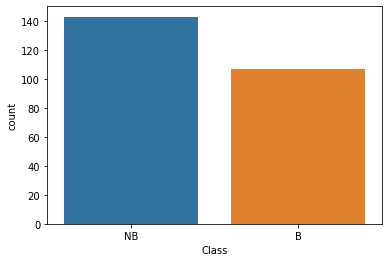

In [15]:
sns.countplot(df['Class'])

In [16]:
#To analyse the features let us split the features

In [17]:
X = df.iloc[:,0:6]

In [18]:
X.apply(pd.Series.value_counts).T

,A,N,P
IndustrialRisk,81,89,80
ManagementRisk,69,119,62
FinancialFlexibility,74,119,57
Credibility,77,94,79
Competitiveness,56,103,91
OperatingRisk,57,114,79


In [19]:
# negative count is always high in 
# comparison to the average and positive counts for all the attributes.

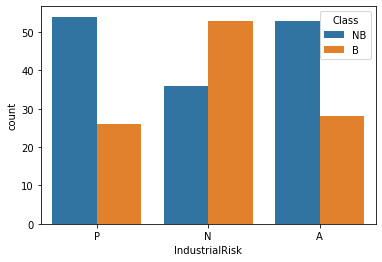

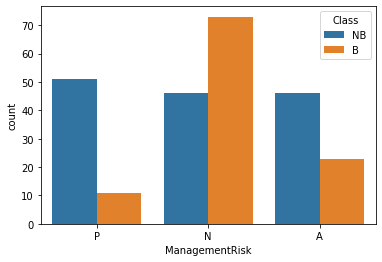

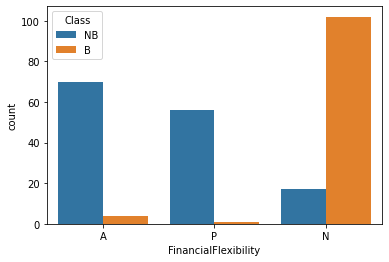

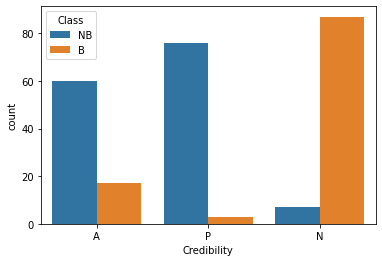

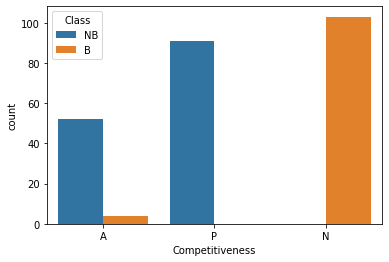

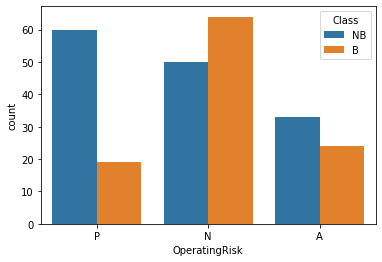

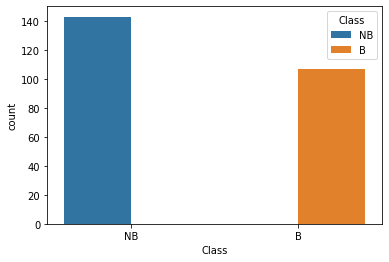

In [20]:
for col in df.columns:
    sns.countplot(df[col],hue= df['Class'])
    plt.show()

In [21]:
#  Bankruptcy is high for the negative value on
# all the attributes and least for the positive values.

## 2.	Encode independent features. 4 points


Using oneHotEncoder to split the columns with numerical categorical data to many columns depending on the number of categories present in that column. 
Each column contains “0” or “1” corresponding to which column it has been placed.

one hot coding removes the order in the encoded numerical data 


In [22]:
from sklearn.preprocessing import OneHotEncoder

X = OneHotEncoder().fit_transform(X).toarray() 

In [23]:
X_encoded = pd.DataFrame(X)

In [24]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 18 columns):
0     250 non-null float64
1     250 non-null float64
2     250 non-null float64
3     250 non-null float64
4     250 non-null float64
5     250 non-null float64
6     250 non-null float64
7     250 non-null float64
8     250 non-null float64
9     250 non-null float64
10    250 non-null float64
11    250 non-null float64
12    250 non-null float64
13    250 non-null float64
14    250 non-null float64
15    250 non-null float64
16    250 non-null float64
17    250 non-null float64
dtypes: float64(18)
memory usage: 35.3 KB


In [25]:
# totally there are 18 features now 3 corresponding to each of the 6 original columns before hot coding

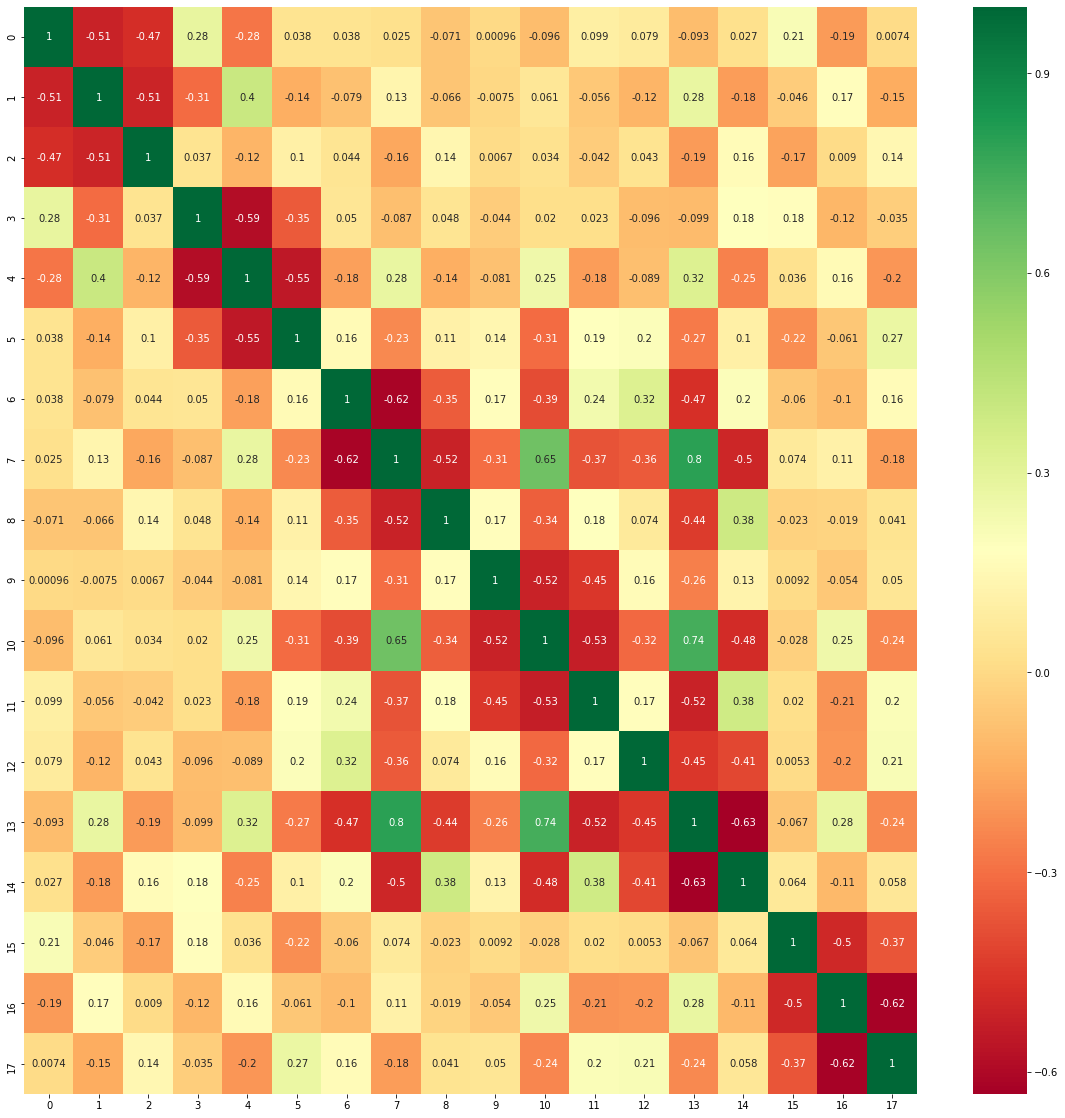

In [80]:
#correlation
x = X_encoded.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

### we have transformed all the cloumns into Numerical value so as it will best suit for our modelling purpose.



In [27]:
X_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
0,250.0,0.324,0.468939,0.0,0.0,0.0,1.0,1.0
1,250.0,0.356,0.479776,0.0,0.0,0.0,1.0,1.0
2,250.0,0.320,0.467412,0.0,0.0,0.0,1.0,1.0
3,250.0,0.276,0.447914,0.0,0.0,0.0,1.0,1.0
4,250.0,0.476,0.500426,0.0,0.0,0.0,1.0,1.0
5,250.0,0.248,0.432718,0.0,0.0,0.0,0.0,1.0
6,250.0,0.296,0.457407,0.0,0.0,0.0,1.0,1.0
7,250.0,0.476,0.500426,0.0,0.0,0.0,1.0,1.0
8,250.0,0.228,0.420384,0.0,0.0,0.0,0.0,1.0
9,250.0,0.308,0.462593,0.0,0.0,0.0,1.0,1.0


In [28]:
#check for null vaues
X_encoded.isnull().any()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

## 3.	Separate the dependant variable from the rest of the train data 2 point


In [29]:

y= df.iloc[:,6]


print(y.shape)

(250,)


## 4.	Split the dataset into training and test data ( Take 80:20 ratio). 2 points


In [30]:
from sklearn.model_selection import train_test_split 

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y,test_size = .20,random_state = 2)

In [32]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", y_test.shape)

X_train shape: (200, 18)
X_test shape: (50, 18)
Y_train shape: (200,)
X_test shape: (50,)


## 5.	Apply PCA on the independent features of train data. 2 point


In [33]:
# standardize the dataframe
from sklearn.preprocessing import StandardScaler


In [34]:
sc = StandardScaler()
X_train_Sc =  sc.fit_transform(X_train) 

In [35]:
# find covariance matrix

In [36]:
cov_matrix = np.cov(X_train_Sc.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[ 1.00502513e+00 -5.11733746e-01 -4.83900986e-01  2.56218296e-01
  -2.47411457e-01  3.50566107e-02 -1.17061400e-02  7.45991161e-02
  -7.76937830e-02 -4.86764306e-02 -3.12924924e-02  8.14164038e-02
   6.99291870e-02 -2.89589786e-02 -3.04719616e-02  1.44865243e-01
  -1.48534265e-01  2.73809745e-02]
 [-5.11733746e-01  1.00502513e+00 -5.11733746e-01 -3.52992969e-01
   4.22664834e-01 -1.38866579e-01 -9.19616102e-02  1.27537269e-01
  -5.25721848e-02  5.62344776e-03  1.75592100e-02 -2.38146915e-02
  -1.11905197e-01  2.50032322e-01 -1.57775145e-01  1.36664043e-02
   1.43743872e-01 -1.68190414e-01]
 [-4.83900986e-01 -5.11733746e-01  1.00502513e+00  1.03252149e-01
  -1.83009342e-01  1.06358192e-01  1.05355260e-01 -2.04476714e-01
   1.31230676e-01  4.29497917e-02  1.34110682e-02 -5.71647090e-02
   4.40294881e-02 -2.25661475e-01  1.91142305e-01 -1.58782428e-01
   2.15267051e-03  1.43895760e-01]
 [ 2.56218296e-01 -3.52992969e-01  1.03252149e-01  1.00502513e+00
  -5.33043595e-01

Step 3: Calculating the Eigenvectors and Eigenvalues

Here we get the PCA components and information they are capturing respectively.

In [37]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n', eigenvectors)
print('\n Eigen Values \n', eigenvalues)

Eigen Vectors 
 [[-3.51175358e-02 -4.72596106e-01 -3.19412828e-02  1.06833909e-01
  -1.31655850e-01 -6.48437095e-02 -3.22612718e-01  2.44901748e-01
  -1.49101658e-01 -2.12535456e-02  4.59720094e-01  1.18736149e-01
   4.42242833e-02  9.78779764e-04  5.30263682e-01  1.85776377e-02
   2.59736782e-01 -4.27209174e-02]
 [ 1.59467772e-01  4.35756645e-01  1.28877060e-01  7.74823523e-02
  -2.44231097e-01 -2.47015697e-01  4.99984940e-01 -5.42997828e-02
   1.96449875e-01  4.82946445e-02  4.64889621e-02  6.26483025e-02
   4.50358057e-02  9.96740524e-04  5.39994102e-01  1.89185403e-02
   2.64502992e-01 -4.35048529e-02]
 [-1.27276495e-01  2.88432592e-02 -9.93006916e-02 -1.85738074e-01
   3.80368625e-01  3.16392183e-01 -1.86547023e-01 -1.89605555e-01
  -5.09531026e-02 -2.79273131e-02 -5.07062136e-01 -1.82534058e-01
   4.42242833e-02  9.78779764e-04  5.30263682e-01  1.85776377e-02
   2.59736782e-01 -4.27209174e-02]
 [-7.63942544e-02 -4.51037863e-01  2.03637234e-02 -1.55429624e-01
   2.68990986e-01 -1.

Computing the Principal Components.

In [38]:

#  Sort eigenvalues in descending order
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs ,'\n')

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(4.600672420252884, array([-0.03511754,  0.15946777, -0.12727649, -0.07639425,  0.25713771,
       -0.21346636, -0.25779479,  0.39699862, -0.19539724, -0.12963653,
        0.36815723, -0.24971586, -0.18131018,  0.4289941 , -0.2798519 ,
        0.04669178,  0.15077465, -0.20621509])), (2.1494714687530165, array([-0.47259611,  0.43575665,  0.02884326, -0.45103786,  0.3134098 ,
        0.07349572,  0.01943061, -0.15931172,  0.17213227,  0.19917317,
       -0.16838697, -0.02682785, -0.00618159, -0.05350819,  0.05954572,
       -0.26537441,  0.27410582, -0.05233451])), (1.847555768758574, array([-0.13165585, -0.2442311 ,  0.38036863,  0.26899099, -0.18719258,
       -0.04352096, -0.1742011 , -0.04827695,  0.2530451 ,  0.03734471,
        0.12721751, -0.16911311, -0.42625669,  0.01089688,  0.35368305,
       -0.1587069 ,  0.36410024, -0.24798706])), (1.764185680841006, array([-0.06484371, -0.2470157 ,  0.31639218, -0.1307115 , -0.22457736,
        0.37049276,  0.07053096,  0.09594587, -0.19

## 6.	Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance). 6 points


In [39]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

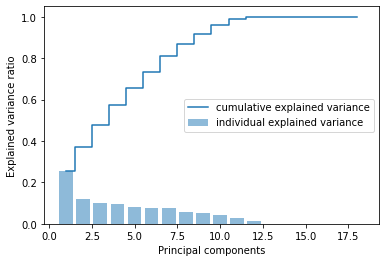

In [40]:

plt.bar(range(1,eigenvalues.size+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,eigenvalues.size+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [41]:
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
print(var_explained)

[0.2543149476750906, 0.11881800618940315, 0.10212877721748809, 0.09752026402426696, 0.08212985444237468, 0.07691663607463393, 0.07628788430956163, 0.05808487611929954, 0.05108478592886164, 0.04430498191036295, 0.026365303131251676, 0.012043682977406015, -3.833717404217277e-17, -6.778449249877348e-17, -1.0416857523072411e-16, -1.4585111361773725e-16, -1.6884036552326086e-16, -2.19699714944507e-16]


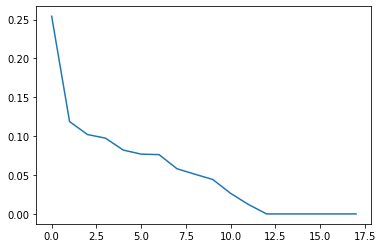

In [42]:
plt.plot(var_explained)

From the above plot:
 
we need to consider 10 PC's . So,that we get >95% of var.

## 7.	Transform the data using PCA ( select optimum number of PCs). 4 points


First we need to reduce the dimentions 

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 10).fit(X_train_Sc)
X_train_pca = pca.transform(X_train_Sc)

In [44]:
X_train_pca.shape

(200, 10)

In [45]:
print(pca.explained_variance_ratio_)

[0.25431495 0.11881801 0.10212878 0.09752026 0.08212985 0.07691664
 0.07628788 0.05808488 0.05108479 0.04430498]


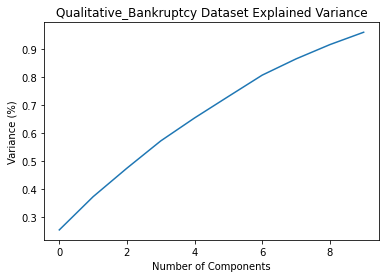

In [46]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Qualitative_Bankruptcy Dataset Explained Variance')
plt.show()

## 8.	Apply KMeans algorithm on the above transformed data. 6 points


In [47]:
X_train_pca = pd.DataFrame(X_train_pca)

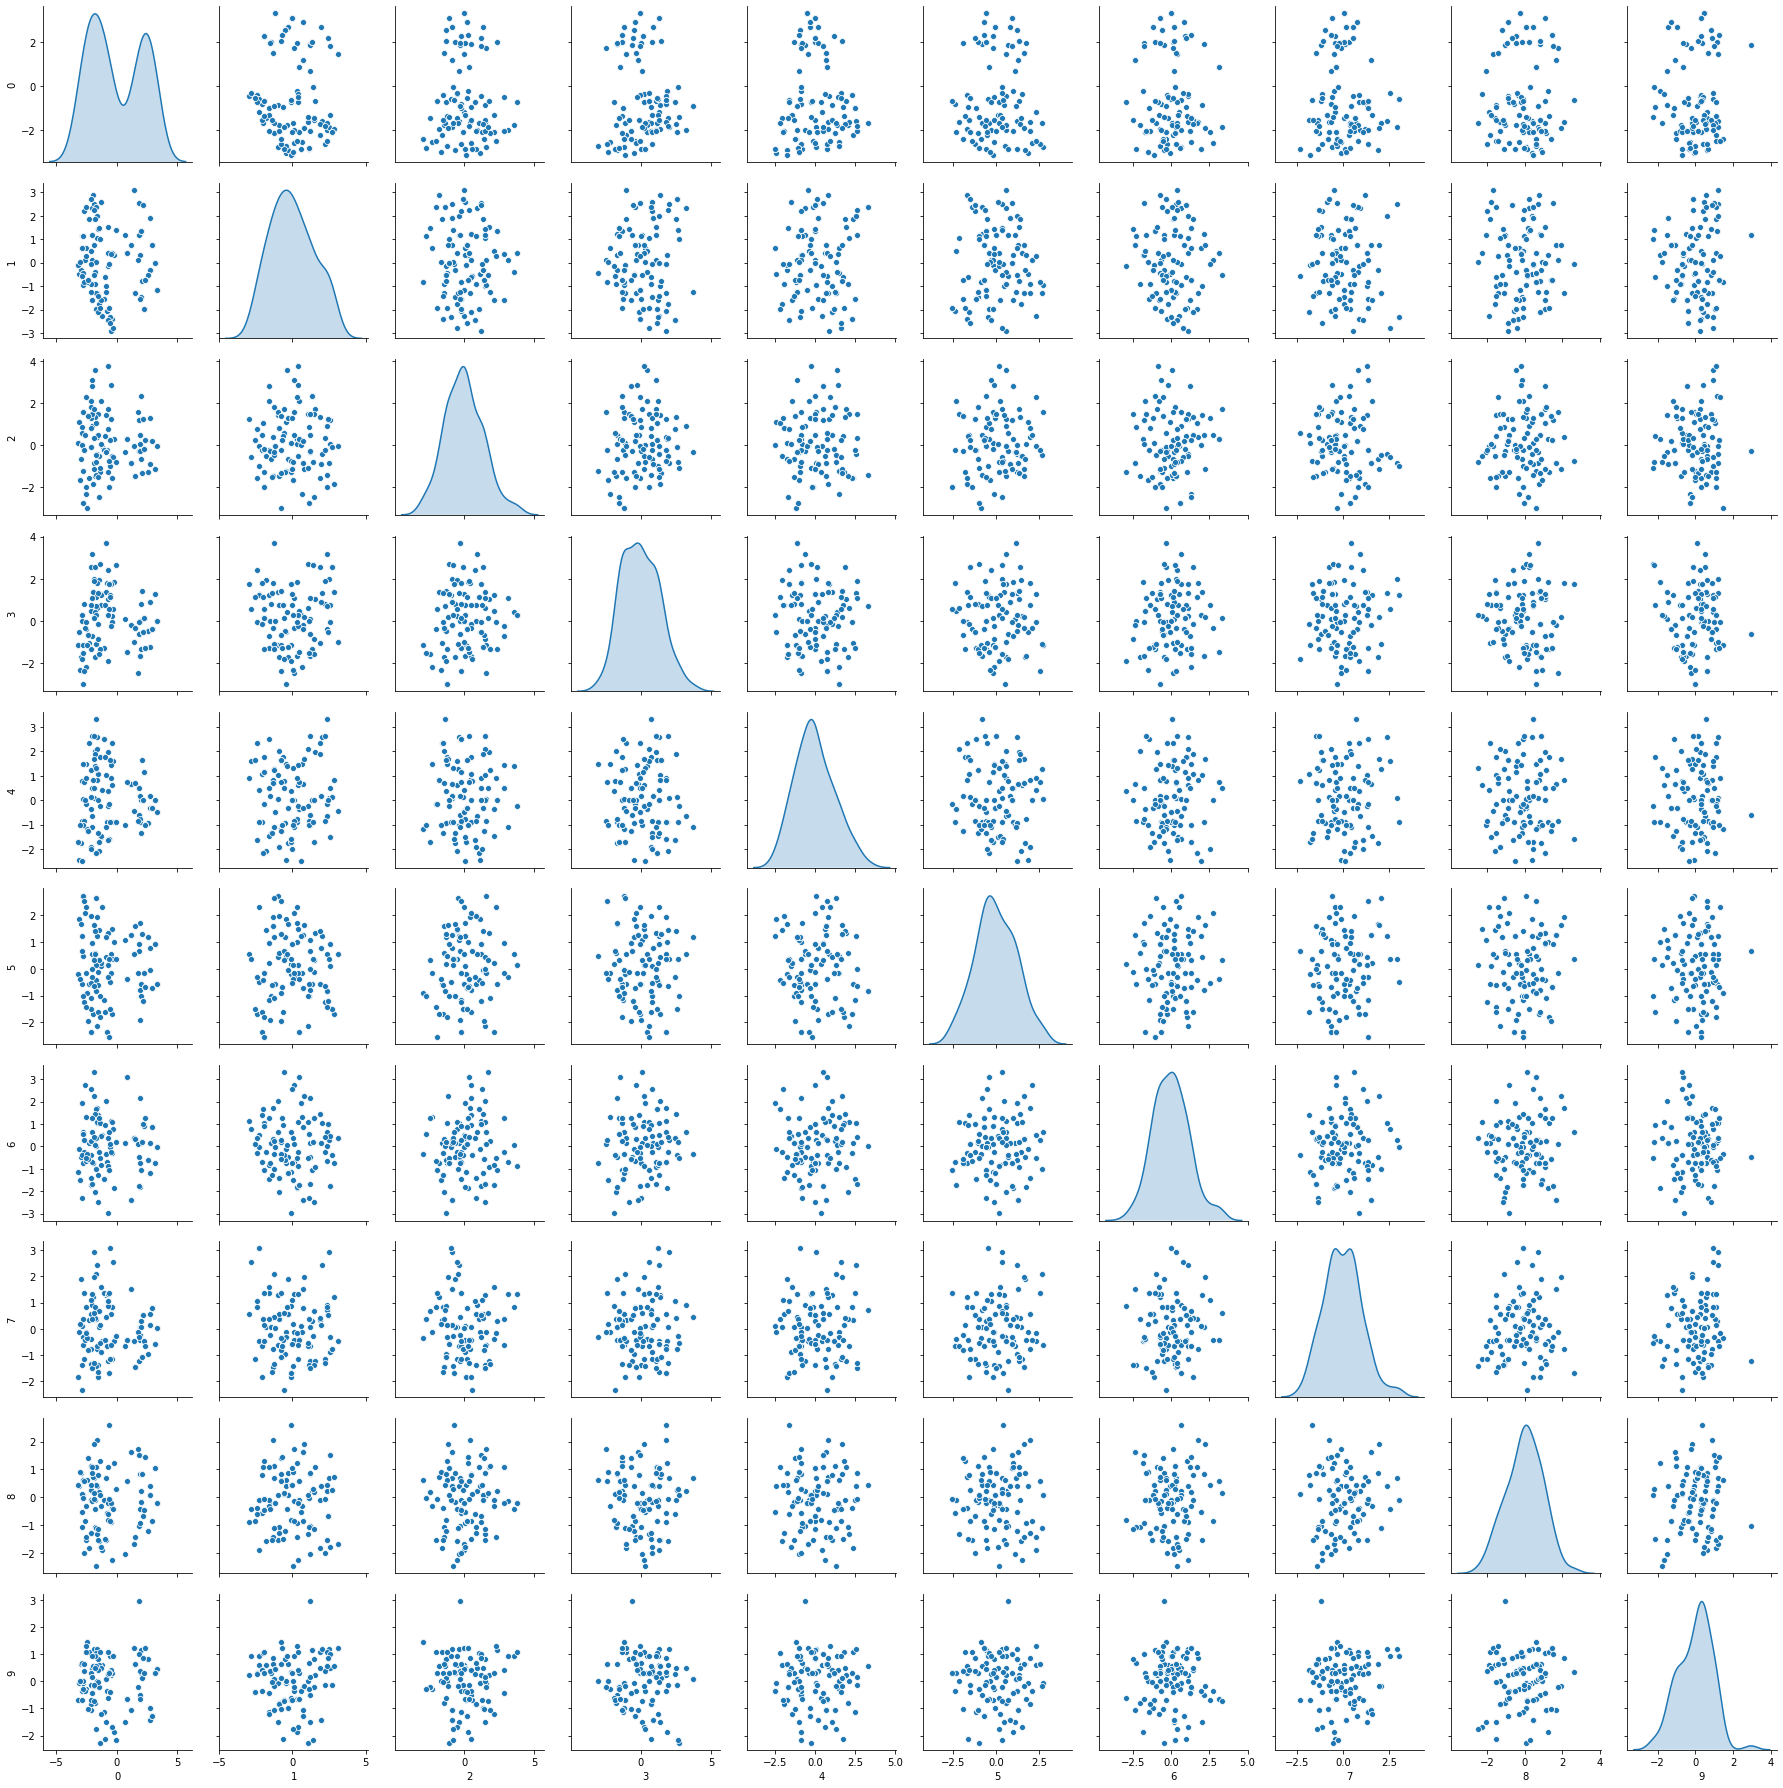

In [48]:
sns.pairplot(X_train_pca,diag_kind = 'kde')

In [81]:
# From the plot above:
    
# Digonals plots - for all the features from X-axis there are 2 heaps visible
# from the Y-axis also maximum 2 clusters are visible .
# We can consider looking from 2 to 4 clusters.          


In [50]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(X_train_pca)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3461.727650
1,2,2647.234827
2,3,2354.370351
3,4,2179.836575
4,5,2011.332891
5,6,1881.611459
6,7,1755.981391
7,8,1649.448495
8,9,1568.476115


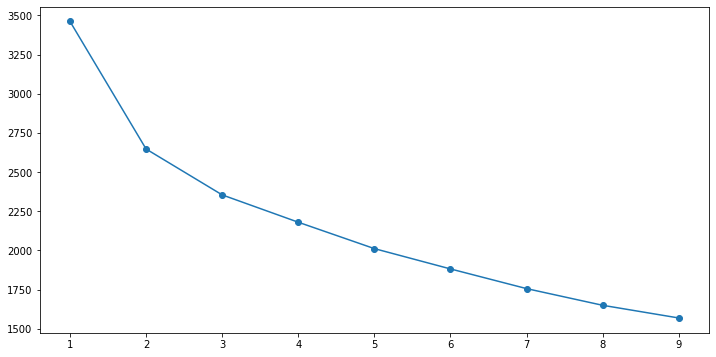

In [51]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

##  9.	Select optimal number of clusters and form clusters out of the train data. 9 points


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

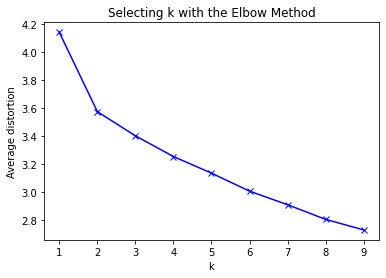

In [52]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_train_pca)
    prediction=model.predict(X_train_pca)
    meanDistortions.append(sum(np.min(cdist(X_train_pca, model.cluster_centers_, 'euclidean'), axis=1)) / X_train_pca.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

From the plot its clear that at k=2 the inertia starts decreasing in almost linear fashion(distortion reduces at same rate which is less than the rate at which it dropped from k=1 to 2), hence k=2 is the optimal value

In [53]:
# K = 2
model_Kmean=KMeans(n_clusters=3, n_init = 15, random_state=7)
model_Kmean.fit(X_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

## 10.	Create a new column in the train data and populate it with the cluster labels. 4 points


In [54]:
prediction_train = model_Kmean.predict(X_train_pca)

In [55]:
prediction_train.shape

(200,)

In [56]:
X_train_pca_copy = X_train_pca.copy()

In [57]:
X_train_pca_copy['Target'] = prediction_train

In [58]:
X_train_pca_copy.head(10)

,0,1,2,3,4,5,6,7,8,9,Target
0,-2.259133,1.869471,-1.559730,-1.063595,2.363942,-0.557740,0.142560,0.326950,-1.826508,1.069904,1
1,2.899599,0.738246,0.215731,-0.406589,-0.335260,-0.698811,0.855743,0.773592,-0.863242,-1.282511,0
2,2.707202,1.914105,-0.889120,0.882001,0.163315,0.786031,0.146812,0.151955,0.414900,-1.437407,0
3,1.198845,0.749432,-0.847118,-0.191520,0.680284,1.257440,-2.383703,1.510507,1.635330,-1.048722,0
4,-0.664169,-1.932660,-1.979057,0.582428,-0.168221,-2.546002,-1.052472,1.353869,-0.076054,0.315279,1
5,-0.246105,0.318460,0.283340,1.850514,-0.889761,0.996982,-1.848884,-0.467235,1.212710,-1.884666,2
6,-1.207225,-2.266526,-0.048785,1.295091,0.426461,2.312318,0.529151,-0.446658,-1.885008,0.603022,2
7,-3.148424,-0.090633,0.113628,-1.141411,-1.729038,-0.176250,-1.147313,-1.814616,0.419825,-0.677207,2
8,-3.148424,-0.090633,0.113628,-1.141411,-1.729038,-0.176250,-1.147313,-1.814616,0.419825,-0.677207,2
9,-2.074104,-0.931516,0.831570,0.758214,-1.920139,1.976246,-1.423855,0.581042,-1.293336,-0.834110,2


## 11.	Transform the test data using the same PCA object that was fit on the train data. 4 points


In [59]:
X_test_Sc = sc.transform(X_test)

In [60]:
X_test_pca = pca.transform(X_test_Sc)

In [61]:
X_test_pca.shape

(50, 10)

## 12.	Use the same kmeans object, assign cluster labels to the test data and store it as a feature. 4 points


In [62]:
#K=2
model_Kmean.fit(X_test_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

In [63]:
prediction_test = model_Kmean.predict(X_test_pca)

In [64]:
prediction_test 

array([1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0,
       2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 1])

In [65]:
X_test_pca_1 = X_test_pca.copy()

In [66]:
X_test_pca_1 = pd.DataFrame(X_test_pca_1)
X_test_pca_1['Target'] = prediction_test 

In [67]:
X_test_pca_1.tail(10)

,0,1,2,3,4,5,6,7,8,9,Target
40,-0.664169,-1.932660,-1.979057,0.582428,-0.168221,-2.546002,-1.052472,1.353869,-0.076054,0.315279,0
41,1.862457,1.178161,-0.270651,-0.637210,-0.603837,0.676635,-0.490274,-1.206704,-1.039558,2.955612,2
42,-0.715149,0.396769,3.743578,0.259692,-0.254314,0.155048,-0.857685,1.317559,-0.207823,1.100498,0
43,1.952419,0.331296,0.039758,-1.691851,-0.784542,1.705606,-1.804749,-0.438195,-0.919364,-0.633951,2
44,3.116515,-0.008501,-1.120077,1.261443,0.016685,0.908192,-0.737242,-0.578254,1.051619,0.299638,2
45,2.702835,-0.332348,1.308925,-1.220544,-0.321011,-0.055587,-1.208377,0.564041,0.064450,-0.992005,2
46,1.253918,-0.813768,-1.913492,0.332620,-1.806131,0.736641,-0.460072,-0.940985,-1.141257,0.662950,2
47,-1.759858,-0.900000,-1.480278,-1.738795,2.036606,0.593391,-2.055970,0.365249,-1.069596,-0.782613,0
48,2.899599,0.738246,0.215731,-0.406589,-0.335260,-0.698811,0.855743,0.773592,-0.863242,-1.282511,2
49,-2.811288,1.117881,-2.739124,-1.538416,-1.033951,-1.006919,0.546599,0.390545,-0.016167,-0.281408,1


## 13.	Apply SVC model on train dataset and predict target for test dataset. 6 points


In [68]:
clf = svm.SVC(gamma=0.025, C=3)  

In [69]:
clf.fit(X_train_pca,y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
y_pred = clf.predict(X_test_pca)

In [71]:
X_test_pca.shape

(50, 10)

## 14.	Check accuracy and confusion matrix. 2 point

In [ ]:
# Train score

In [72]:
clf.score(X_train_pca,y_train)

1.0

In [ ]:
# Test score

In [73]:
clf.score(X_test_pca,y_test)

0.98

In [74]:
pd.crosstab(y_test,y_pred)

col_0,B,NB
Class,,
B,22,1
NB,0,27


In [75]:
print(confusion_matrix(y_test, y_pred))

[[22  1]
 [ 0 27]]


In [76]:
y_test.value_counts()

NB    27
B     23
Name: Class, dtype: int64

In [77]:
from sklearn.metrics import classification_report
target_names = ['B', 'NB' ]

In [78]:
print(classification_report(y_test, y_pred, target_names= target_names))

              precision    recall  f1-score   support

           B       1.00      0.96      0.98        23
          NB       0.96      1.00      0.98        27

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



From the above numbers we can infer the following for Class B:

Precision : out of 22 points identified as positive  by the model all are actually positive i.e 'B'. 100%

Recall : out of total 23 points, model correctly predicted 22 points only. 96%